# External Dataset (Lombardo) 성능 검증 리포트

이 노트북은 모델이 학습 과정에서 보지 못한 **완전히 새로운 외부 데이터(Lombardo Test Set)**를 사용하여 실제 예측 성능(Generalization)을 평가합니다.

### 분석 데이터:
- 외부 테스트 데이터셋: `External_Test_ALL_Lombardo_FDA_CL_fu_V2/All_external_test_Sets.csv`

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경로 설정
PROJECT_ROOT = ".."
sys.path.append(PROJECT_ROOT)
sys.path.append(os.path.join(PROJECT_ROOT, "validation"))

from pksmart.models import PKSmartPipeline
from validation_utils import (eval_regression_metrics, plot_pred_vs_true, 
                               plot_fold_error_hist, plot_cumulative_fold_error, 
                               plot_residual, plot_feature_importance)

sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (6, 6)
try:
    plt.rcParams['font.family'] = 'AppleGothic'
except:
    pass

print("환경 설정 완료!")

환경 설정 완료!


In [2]:
# 1. 외부 데이터 및 모델 로드
EXTERNAL_DATA_PATH = os.path.join(PROJECT_ROOT, "External_Test_ALL_Lombardo_FDA_CL_fu_V2", "All_external_test_Sets.csv")
MODEL_DIR = os.path.join(PROJECT_ROOT, "models")

df = pd.read_csv(EXTERNAL_DATA_PATH)
df = df.dropna(subset=['smiles_r']).reset_index(drop=True)

pipeline = PKSmartPipeline(MODEL_DIR)
print(f"외부 검증 데이터 로드 완료: {len(df)} compounds")

외부 검증 데이터 로드 완료: 315 compounds


In [3]:
# 2. 피처 생성 및 외부 데이터 예측
from pksmart.features import generate_features

print("피처 추출 중 (외부 데이터)... (시간이 조금 소요될 수 있습니다)")
features_df = generate_features(df['smiles_r'].tolist())

print("예측 실행 중...")
preds_df = pipeline.run_pipeline(features_df)
preds_df = preds_df.add_suffix("_pred")

# 결과 결합
results = pd.concat([df, preds_df], axis=1)
print("외부 데이터 예측 및 병합 완료!")

DEBUG: LOADING LOCAL FEATURES.PY
피처 추출 중 (외부 데이터)... (시간이 조금 소요될 수 있습니다)


[00:04:10] Initializing MetalDisconnector
[00:04:10] Running MetalDisconnector
[00:04:10] Initializing Normalizer
[00:04:10] Running Normalizer
[00:04:10] Initializing MetalDisconnector
[00:04:10] Running MetalDisconnector
[00:04:10] Initializing Normalizer
[00:04:10] Running Normalizer
[00:04:10] Running LargestFragmentChooser
[00:04:10] Running Uncharger
[00:04:10] Removed positive charge.
[00:04:10] Removed positive charge.
[00:04:10] Initializing MetalDisconnector
[00:04:10] Running MetalDisconnector
[00:04:10] Initializing Normalizer
[00:04:10] Running Normalizer
[00:04:10] Initializing MetalDisconnector
[00:04:10] Running MetalDisconnector
[00:04:10] Initializing Normalizer
[00:04:10] Running Normalizer
[00:04:10] Running LargestFragmentChooser
[00:04:10] Running Uncharger
[00:04:10] Removed positive charge.
[00:04:10] Initializing MetalDisconnector
[00:04:10] Running MetalDisconnector
[00:04:10] Initializing Normalizer
[00:04:10] Running Normalizer
[00:04:10] Initializing MetalD

Calculating Morgan Fingerprints...


[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerator
[00:04:12] DEPRECATION WARNING: please use MorganGenerat

Calculating Mordred Descriptors...
  Computing Mordred descriptors (batch mode)...
    Processing Mordred for mol 0/315
    Processing Mordred for mol 100/315
    Processing Mordred for mol 200/315
    Processing Mordred for mol 300/315
예측 실행 중...


/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/sklearn/impute/_base.py:641: UserWarning: Skipping features without any observed values: ['MAXsLi' 'MAXssBe' 'MAXssssBe' 'MAXssBH' 'MAXssssB' 'MAXddC' 'MAXsNH3'
 'MAXssNH2' 'MAXsssNH' 'MAXsSiH3' 'MAXssSiH2' 'MAXsssSiH' 'MAXssssSi'
 'MAXsPH2' 'MAXssPH' 'MAXsssP' 'MAXsssssP' 'MAXdS' 'MAXdssS' 'MAXsGeH3'
 'MAXssGeH2' 'MAXsssGeH' 'MAXssssGe' 'MAXsAsH2' 'MAXssAsH' 'MAXsssAs'
 'MAXsssdAs' 'MAXsssssAs' 'MAXsSeH' 'MAXdSe' 'MAXssSe' 'MAXaaSe'
 'MAXdssSe' 'MAXddssSe' 'MAXsSnH3' 'MAXssSnH2' 'MAXsssSnH' 'MAXssssSn'
 'MAXsPbH3' 'MAXssPbH2' 'MAXsssPbH' 'MAXssssPb' 'MINsLi' 'MINssBe'
 'MINssssBe' 'MINssBH' 'MINssssB' 'MINddC' 'MINsNH3' 'MINssNH2' 'MINsssNH'
 'MINsSiH3' 'MINssSiH2' 'MINsssSiH' 'MINssssSi' 'MINsPH2' 'MINssPH'
 'MINsssP' 'MINsssssP' 'MINdS' 'MINdssS' 'MINsGeH3' 'MINssGeH2'
 'MINsssGeH' 'MINssssGe' 'MINsAsH2' 'MINssAsH' 'MINsssAs' 'MINsssdAs'
 'MINsssssAs' 'MINsSeH' 'MINdSe' 'MINssSe' 'MINaaSe' 'MINdssSe'
 'M

외부 데이터 예측 및 병합 완료!


In [4]:
# 3. 외부 검증 지표 산출
endpoints = {
    "human_CL_mL_min_kg": "Clearance (CL)",
    "human_VDss_L_kg": "Vol. of Distribution (VDss)",
    "human_fup": "Fraction Unbound (fup)",
    "human_thalf": "Half-life (t1/2)"
}

all_metrics = []
for col, name in endpoints.items():
    if col not in results.columns: continue
    valid_data = results[[col, col + "_pred"]].dropna()
    if len(valid_data) == 0: continue
    
    y_true = valid_data[col]
    y_pred = valid_data[col + "_pred"]
    
    is_log = "fup" not in col
    if is_log:
        mask = y_true > 0
        y_t = np.log10(y_true[mask])
        y_p = y_pred[mask]
    else:
        y_t = y_true
        y_p = y_pred

    metrics = eval_regression_metrics(y_p, y_t, log_transformed=is_log, fu_endpoint=("fup" in col))
    metrics['Endpoint'] = name
    all_metrics.append(metrics)

metrics_df = pd.DataFrame(all_metrics).set_index("Endpoint")
print("--- 외부 검증 (External Validation) 결과 ---")
metrics_df

--- 외부 검증 (External Validation) 결과 ---


,R2,RMSE,GMFE,within_2fold_%,within_3fold_%,within_5fold_%,bias_median
Endpoint,,,,,,,
Clearance (CL),0.467473,0.440027,1.983503,66.887417,77.814570,88.410596,-0.044384
Vol. of Distribution (VDss),0.353022,0.573993,2.590807,49.019608,64.705882,82.352941,0.006242
Fraction Unbound (fup),0.302853,0.214058,4.280803,29.411765,41.176471,61.764706,0.064939
Half-life (t1/2),0.177331,0.639314,3.173114,42.105263,55.263158,78.947368,-4.490114


/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:112: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


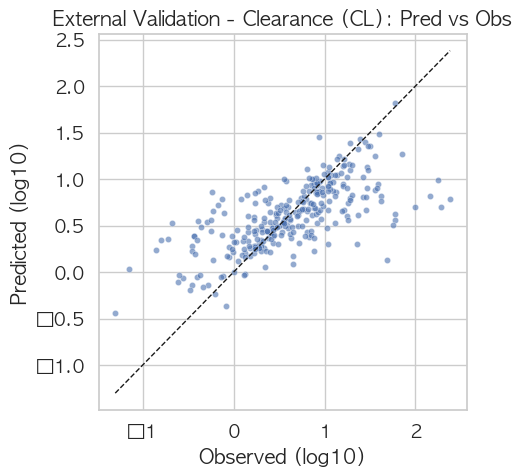

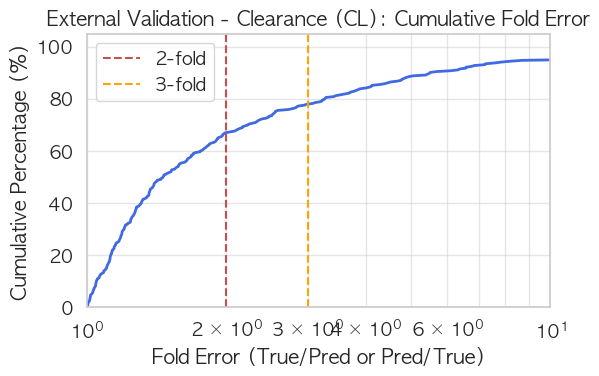

/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:112: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


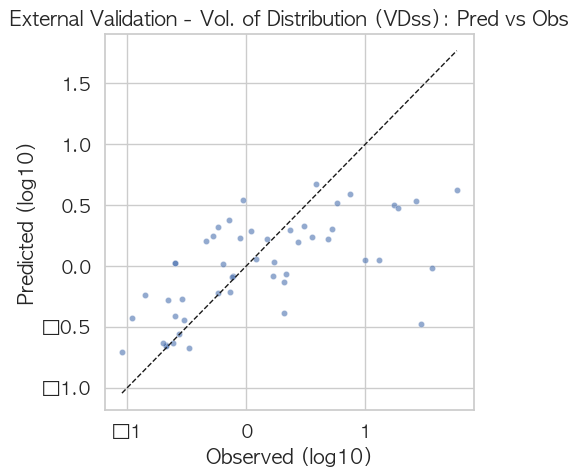

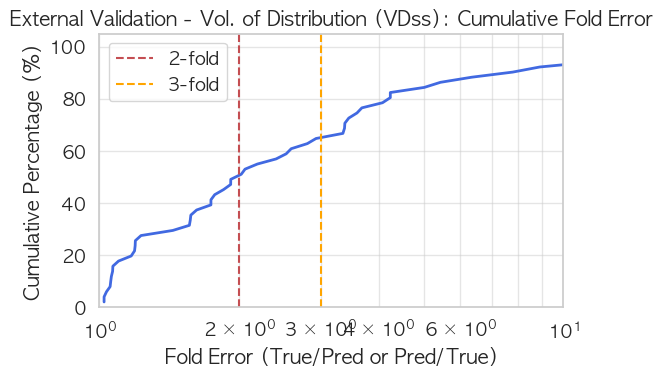

/Users/admin/Downloads/PKSmart_Phase1_Backup/validation/validation_utils.py:112: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/admin/Downloads/PKSmart_Phase1_Backup/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


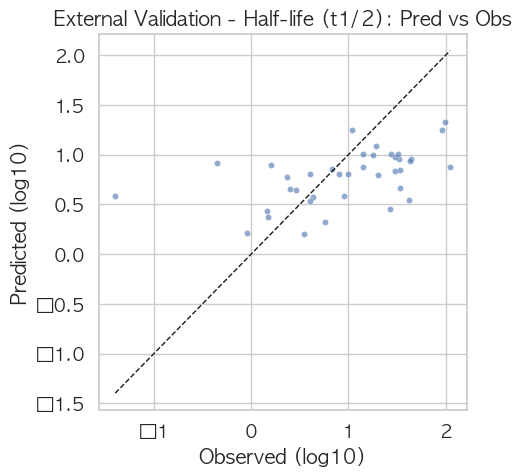

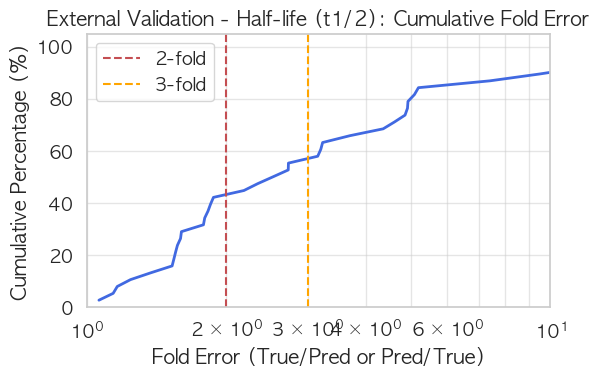

In [5]:
# 4. 시각화 (외부 데이터 기준)
for col, name in endpoints.items():
    if col + "_pred" not in results.columns: continue
    valid_idx = results[col].dropna().index
    if len(valid_idx) == 0: continue
    
    y_true = results.loc[valid_idx, col]
    y_pred = results.loc[valid_idx, col + "_pred"]
    
    is_log = "fup" not in col
    if is_log:
        mask = y_true > 0
        y_t_log = np.log10(y_true[mask])
        y_p_log = y_pred[mask]
        
        plot_pred_vs_true(y_p_log, y_t_log, title=f"External Validation - {name}: Pred vs Obs")
        plot_cumulative_fold_error(y_p_log, y_t_log, title=f"External Validation - {name}: Cumulative Fold Error")

/var/folders/fm/wsr26cj176bfqph7s7tp_sdc0000gn/T/ipykernel_263/1018466121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Endpoint", y="within_2fold_%", data=metrics_df.reset_index(), palette="magma")


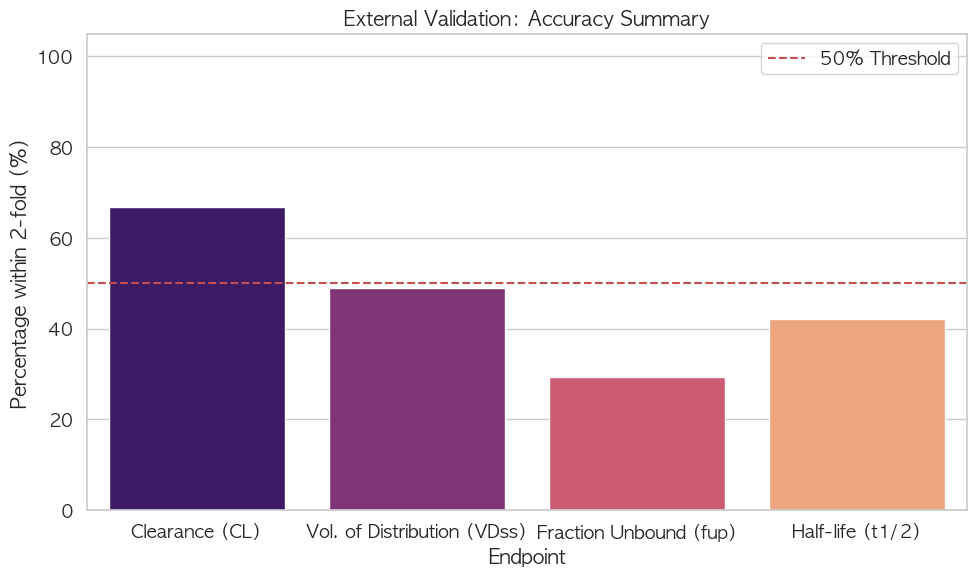

In [6]:
# 5. 요약 차트
plt.figure(figsize=(10, 6))
sns.barplot(x="Endpoint", y="within_2fold_%", data=metrics_df.reset_index(), palette="magma")
plt.axhline(50, color='r', linestyle='--', label='50% Threshold')
plt.title("External Validation: Accuracy Summary")
plt.ylabel("Percentage within 2-fold (%)")
plt.ylim(0, 105)
plt.legend()
plt.tight_layout()
plt.show()